In [2]:
#1) 주변 정보에서 화소 값을 계산하고 노이즈를 계산한다.
import cv2
import numpy as np

kernel = np.ones((3,3))/9.0  #회선에 사용하는 필터

img = cv2.imread('c:\\opencv_test\\Lenna.png')

img_kel = cv2.filter2D(img,-1,kernel)
# 인수 "-1"은 원본 이미지 (img)를 돌려주는 것을 의미

cv2.imshow('img_kel',img_kel)

#종료
cv2.waitKey(0)  #무한 기다림
cv2.destroyAllwindows()

AttributeError: module 'cv2.cv2' has no attribute 'destroyAllwindows'

In [8]:
#1) 주변 정보에서 화소 값을 계산하고 노이즈를 계산한다.
import cv2
import numpy as np

kernel = np.ones((3,3))/9.0  #회선에 사용하는 필터

img = cv2.imread('c:\\opencv_test\\Lenna.png',0)

img_kel = cv2.filter2D(img,-1,kernel)
# 인수 "-1"은 원본 이미지 (img)를 돌려주는 것을 의미

#laplacian
kernel_laplacian_3x3 = np.array([[1,1,1],
                                 [1,-8,1],
                                 [1,1,1]],np.float32)

img_kel_laplacian = cv2.filter2D(img, -1, kernel_laplacian_3x3)

#laplacian
kernel_laplacian_3x3_2 = np.array([[-1,-1,-1],
                                 [-1,9,-1],
                                 [-1,-1,-1]],np.float32)

img_kel_laplacian2 = cv2.filter2D(img, -1, kernel_laplacian_3x3_2)

#gaussian
kernel_gaussian = np.array([[1,2,1],
                                 [2,4,2],
                                 [1,2,1]],np.float32) / 16

img_kel_gaussian = cv2.filter2D(img, -1, kernel_gaussian)

#이미지 보기
cv2.imshow('img_kel',img_kel)
#cv2.imshow('laplacian',img_kel_laplacian)
#cv2.imshow('laplacian2',img_kel_laplacian2)
cv2.imshow('gaussian',img_kel_gaussian)

#종료
cv2.waitKey(0)  #무한 기다림
cv2.destroyAllwindows()

AttributeError: module 'cv2.cv2' has no attribute 'destroyAllwindows'

(<AxesSubplot:title={'center':'blurred'}>,
 Text(0.5, 1.0, 'blurred'))

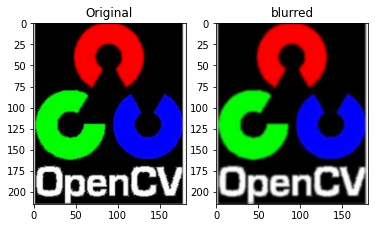

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\opencv_test\\cv_logo.png')
blur = cv2.blur(img,(3,3))  #cv2.blur()  또는 cv2.boxFilter() 평균필터

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('blurred')

(<AxesSubplot:title={'center':'Gaussian'}>,
 Text(0.5, 1.0, 'Gaussian'))

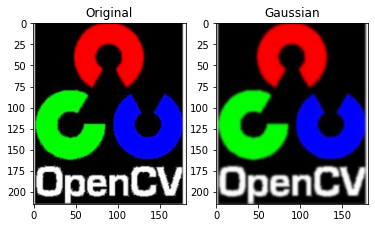

In [12]:
#cv2.GaussianBlur(src,ksize,sigmaX[,dst[, sigmaY[, border Type]]])  ->  dst
#sigmaX  행방향
#sigmaY  열방향  가우스 표준 편차값
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\opencv_test\\cv_logo.png')
blur = cv2.GaussianBlur(img,(5,5),0)  #cv2.blur()  또는 cv2.boxFilter() 평균필터

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('Gaussian')

(<AxesSubplot:title={'center':'median'}>,
 Text(0.5, 1.0, 'median'))

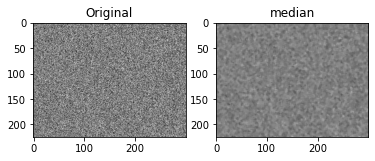

In [16]:
#cv2.medianBlur(src,ksize[,dst])
#sigmaX  행방향
#sigmaY  열방향  가우스 표준 편차값
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\opencv_test\\noise.png')
blur = cv2.medianBlur(img,5)  #cv2.blur()  또는 cv2.boxFilter() 평균필터

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('median')

(<AxesSubplot:title={'center':'bilateralFilter'}>,
 Text(0.5, 1.0, 'bilateralFilter'))

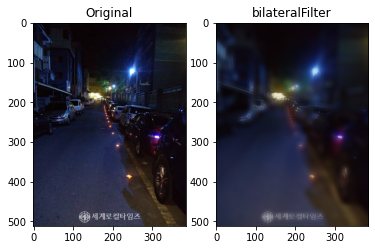

In [23]:
#bilateralFilter(src,d,sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
#비선형 필터를 구현할 때 사용, 밝기변화가 심한 부분은 남겨두고 휘도변화만 원만하게 만들어 준다.
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\opencv_test\\r2.jpg')
blur = cv2.bilateralFilter(img,20,250,100)  #cv2.blur()  또는 cv2.boxFilter() 평균필터

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(blur),plt.title('bilateralFilter')

In [ ]:
#4. 이미지 처리 : 이미지 팽창, 수축
# cv2.erod() : 수축 -> cv2.dilate() 팽창
# 싱크대 조리기구 -> 카테고리

#cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst

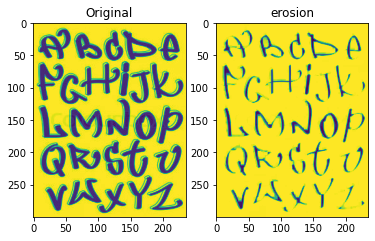

In [42]:
#수축
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\opencv_test\\letters.jpg',0)
kernel = np.ones((5,5), np.uint8)
erosion = cv2.dilate(img,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(erosion),plt.title('erosion')
plt.show()

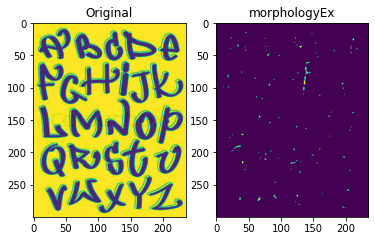

In [47]:
#cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst
#cv2.MORPH_CLOSE : 팽창한 다음 수축
#cv2.MORPH_OPEN : 수축한 다음 팽창
#cv2.MORPH_BLACKHAT : 입력한 이미지와 처리된 이미지의 차이를 표시
#cv2.MORPH_GRADIENT : 외곽선
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('c:\\opencv_test\\letters.jpg',0)
ret,img_th = cv2.threshold(img,110,255,cv2.THRESH_BINARY)
kernel = np.ones((3,3), dtype = np.uint8)
img_d = cv2.dilate(img_th,kernel)
img_e = cv2.erode(img_th,kernel)

img_res = cv2.morphologyEx(img_th,cv2.MORPH_TOPHAT,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(img_res),plt.title('morphologyEx')
plt.show()

In [ ]:
#5. 특정 픽셀 - ORB 특징 픽셀 추출, 매칭, 거리계산

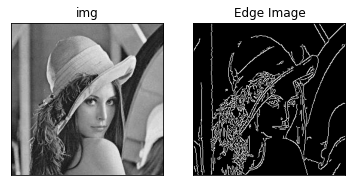

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('c:\\opencv_test\\Lenna.png',0)
edges = cv2.Canny(img,100,200) #Canny(image, 낮은임계값, 높은 임계값 [, edges[, apertureSize[, L2gradiant]]])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('img'), plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]),plt.yticks([])

plt.show()

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

def onTrackbar(th):
    # 가우시안 블러링 : 명암도 영상(흑백)에서 부드러운 영역제거
    e_edge = cv2.GaussianBlur(res_gray,(5,5),0)
    #캐니 에지 검출
    e_edge = cv2. Canny(e_edge, th, th*2, 5)
    
    h,w = img.shape[:2]
    cv2.rectangle(e_edge,(0,0,w,h),255,-1) #흰색 사각형그리기
    color_dege = cv2.bitwise_and(res_img,res_img,mask=e_edge)
    cv2.imshow("edge",color_dege)

img = cv2.imread('c:\\opencv_test\\Lenna.png',cv2.IMREAD_COLOR)
if img is None : raise Exception("파일오류")

th = 50
res_img = cv2.repeat(img,1,2)  #가로로 반복
 #BGR -> GRAY
res_gray = cv2.cvtColor(res_img,cv2.COLOR_BGR2GRAY)  #흑백, -> 명암도 영상

cv2.namedWindow("edge", cv2.WINDOW_AUTOSIZE) #윈도우 생성
cv2.createTrackbar("Canny","edge",th,100,onTrackbar)  #트랙바 생성, onTrackbar 콜백함수생성

onTrackbar(th)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
#모폴리지 예제..
# 닫힘 연산 마스크 -> 명암도 -> 블러링 -> 소벨에지 -> 이진화 닫힘 연산(모폴리지)
# Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
# Sobel(입력이미지, 출력이미지 비트단위, dx(x방향미분차수), dy(y방향미분차수), ksize(커널의 크기))
# (dx,dy) = (1,0) => 가로 방향의 윤곽검출
# (dx,dy) = (0,1) => 세로 방향의 윤곽검출
# (dx,dy) = (1,1) => 대각선 오른 쪽 방향의 윤곽검출

import numpy as np
from matplotlib import pyplot as plt
import cv2

#1 이미지를 컬러로 읽자
image = cv2.imread("c:\\opencv_test\\volvo.jpg",cv2.IMREAD_COLOR)
image = cv2.resize(image,(700,700))

#2. 닫힘 연산 마스크
mask = np.ones((5,17),np.uint8)  #cv2.MORPH_CLOSE

#3. 명암도 영상변환 = 흑백 이미지 변환
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#4. 블러링
gray_img = cv2.blur(gray_img,(5,5))
#gray_img2 = cv2.blur(gray_img,(20,20))

#5. 소벨에지
gray_img = cv2.Sobel(gray_img,cv2.CV_8U,1,0,5)  #소벨 에지 : 윤곽을 이용한 공간 필터 = cv2.filter2D()

#6 이진화 닫힘 연산(모폴로지)
a, th_img = cv2.threshold(gray_img, 120,255, cv2.THRESH_BINARY)  #
morph_res = cv2.morphologyEx(th_img, cv2.MORPH_CLOSE, mask, iterations=3)

cv2.imshow("원본",image)
cv2.imshow("test",gray_img)
#cv2.imshow("test2",gray_img2)
cv2.imshow("morph_res",morph_res)

cv2.waitKey(0)
cv2.destroyAllWindows()